# Rolling balls

Two balls of identical mass are set rolling at the
same velocity. Which reaches the end of the track
first. Is it

1. a
2. b
3. they arrive at the same time

![Rolling balls](images/rolling_balls.png)

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

def rolling_time(
    case="b", v0=1, theta=45, total_length=1, depth=1, g=9.8):
    """
    Calculate time take for ball to traverse a given longitudinal distance,
    with or without a depression.

    Motion is approximated as being in two dimensions, and loss free.  The
    depression is modelled as being symmetrical, with a flat base, and
    with straight sides, at angles +/-theta with repect to the horizontal.
    The total length covered by the depression sets a minimum value for
    theta.  The calculation of time taken is based on determining the changes
    in velocity that occur as gravitational potential energy is converted
    to and from kinetic energy.
    
    **Parameters:**
    
    case : str, default="a"
        Case considered:
          
            - "a" : without depression;
            - "b" : with depression.
            
        Note that case "a" gives the same result as case "b" for
        a depression depth of 0.
            
    v0 : float, default=1
        Initial velocity (m/s) of ball.
            
    theta : float, default=45
        Angle (degrees) between horizonal and slope of depression.
        
    depth : float, default=1
        Depth (m) of depression.
        
    total_length : float, default=1
        Length (m) between start and end of depression.
        
    g : float, default=9.8
        Graviational acceleration (m / s**2).
        
    **Returns:**

    t_total : float
        Time (s) to traverse total length covered by depression.
    """
    if case not in ["a", "b"]:
        return np.nan
    
    # Determine cos, sin, tan for angle,
    # approximating values of 0 to small number to avoid divisions by zero.
    small_number = 1e-10
    cos_theta = math.cos(math.radians(theta)) or small_number
    sin_theta = math.sin(math.radians(theta)) or small_number
    tan_theta = math.tan(math.radians(theta)) or small_number

    # Determine time taken in absence of depression.
    if "a" == case:
        t_total = total_length / v0
        
    # Etermine time taken when traversing depression.
    elif "b" == case:
        if abs(theta) > math.degrees(math.atan2(depth, total_length)):
            t_slope = ((math.sqrt(v0 * v0 + 2 * g * depth) - v0)
                       / (g * sin_theta))
            t_flat = ((total_length - 2 * depth / tan_theta)
                      / math.sqrt(v0 * v0 + 2 * g * depth))
            t_total = t_flat + 2 * t_slope
        else:
            t_total = np.nan
                
    return t_total

In [2]:
def ensure_iterable(items=None, default=None):
    """
    Return iterable based on input data.
    
    **Parameters:**
    
    items : int/float/iterable/None, default=None
        Input data.
        
    default : iterable/None, default=None
        Value to be returned if items is None.  If None, set to an empty list.

    **Returns:**
    
    out_items : iterable based on input data.    
    """
    if default is None: default = []
    out_items = default if items is None else items
    
    if isinstance(out_items, (float, int)):
        out_items = [out_items]
    return out_items

def plot_times(v0s=None, thetas=None, total_lengths=None, depths=None):
    """
    Plot times taken for a rolling ball to traverse a depression.
    
    Times are plotted as over the range of slope angles (<thetas>)
    for all combinations of initial ball velocity (<v0s>),
    depression length (<total_lengths>) and depression depth (<depths>).
    
    **Parameters:**
    
    v0s : int/float/iterable/None, default=None
        Initial velocity/velocities (m/s) of rolling ball.
        If None, set to [1].
    
    thetas : int/float/iterable/None, default=None
        Slope(s) (degrees) of depression sides.
        If None, set to np.linspace(0, 90, 90).

    total_lengths : int/float/iterable/None, default=None
        Length(s) (m) covered by depression.
        if None, set to [4].

    depths : int/float/iterable/None, default=None
        Depth(s) (m) of depression.
        If None, set to [0, 0.4].
    """
    # Ensure that parameters for creating plots are iterable.
    v0s = ensure_iterable(v0s, [1])
    thetas = ensure_iterable(thetas, np.linspace(0, 90, 90))
    total_lengths = ensure_iterable(total_lengths, [4])
    depths = ensure_iterable(depths, [0, 0.4])

    # Loop over depression length, depression depth, ball's initial velocity.
    legends = []
    for total_length in total_lengths:
        for depth in depths:
            for v0 in v0s:
                # Calculate and plot times; store information for legend.
                times = [rolling_time(v0=v0, theta=theta, depth=depth,
                                      total_length=total_length) for theta in thetas]
                plt.plot(thetas, times)
                legends.append(f"length={total_length}; depth={depth}; v0={v0}")

    # Annotate plot.
    plt.legend(legends)
    plt.xlabel("Theta (degrees)")
    plt.ylabel("Time (s)")
    plt.show()

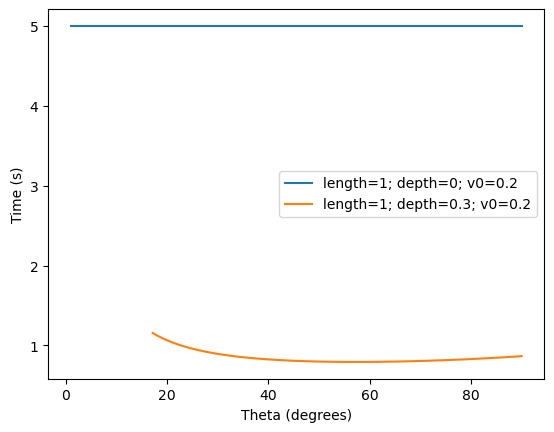

In [3]:

# Initial velocity/velocities (m/s) of rolling ball.
v0s = [0.2]

# Slope(s) (degrees) of depression sides.
thetas = np.linspace(0, 90, 90)

# Length(s) (m) covered by depression.
total_lengths = [1]

# Depth(s) (m) of depression.
depths = [0, 0.3]

# Plot times as functions of slope angle,
# for each combination of initial ball velocity, depression length, depression depth.
plot_times(v0s, thetas, total_lengths, depths)